<img src="https://cdn-images-1.medium.com/max/1600/1*OIIv4FEjJQMqh-zEPhtlYA.png" style="width: 750px;"/>

# Introduction

From google playstore dataset, I decide to make some simple notebook for Exploratory Data Analysis
and do some wrangling data for put it on my prediction model in future 

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

# Data Collection

Data collection is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.[techopedia]

In [2]:
## Read file

data = pd.read_csv('../input/googleplaystore.csv')
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


App: Application name
Category: Category the app belongs to
Rating: Overall user rating of the app (as when scraped)
Reviews: Number of user reviews for the app (as when scraped)
Size: Size of the app (as when scraped)
Installs: Number of user downloads/installs for the app (as when scraped)
Type: Paid or Free
Price: Price of the app (as when scraped)
Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
Last Updated: Date when the app was last updated on Play Store (as when scraped)
Current Ver: Current version of the app available on Play Store (as when scraped)
Android Ver: Min required Android version (as when scraped)

In [3]:
data.shape

(10841, 13)

## Let's see feature corelation

In [4]:
dt_ctg=data.groupby('Category',as_index=False)['Rating'].mean()
dt_ctg.head()

,Category,Rating
0,1.9,19.000000
1,ART_AND_DESIGN,4.358065
2,AUTO_AND_VEHICLES,4.190411
3,BEAUTY,4.278571
4,BOOKS_AND_REFERENCE,4.346067


In [5]:
dt_rvws=data.groupby('Reviews',as_index=False)['Rating'].mean()
dt_rvws.head(10)

,Reviews,Rating
0,0,NaN
1,1,4.179104
2,10,4.250000
3,100,4.200000
4,1000417,4.300000
5,10006,3.100000
6,100082,4.900000
7,100130,4.300000
8,100179,4.100000
9,1002,4.400000


In [6]:
dt_sz=data.groupby('Size',as_index=False)['Rating'].mean()
dt_sz.head(10)

,Size,Rating
0,"1,000+",19.000000
1,1.0M,3.675000
2,1.1M,4.168000
3,1.2M,4.120000
4,1.3M,3.988889
5,1.4M,4.012000
6,1.5M,4.176316
7,1.6M,4.158065
8,1.7M,4.207143
9,1.8M,4.015385


In [7]:
dt_in=data.groupby('Installs',as_index=False)['Rating'].mean()
dt_in.head(6)

,Installs,Rating
0,0,NaN
1,0+,NaN
2,1+,5.000000
3,"1,000+",4.066760
4,"1,000,000+",4.220862
5,"1,000,000,000+",4.258621


In [8]:
dt_gn=data.groupby('Genres',as_index=False)['Rating'].mean()
dt_gn.head(10)

,Genres,Rating
0,Action,4.285475
1,Action;Action & Adventure,4.311765
2,Adventure,4.180822
3,Adventure;Action & Adventure,4.423077
4,Adventure;Brain Games,4.600000
5,Adventure;Education,4.100000
6,Arcade,4.304348
7,Arcade;Action & Adventure,4.346667
8,Arcade;Pretend Play,4.500000
9,Art & Design,4.358929


In [9]:
dt_tp=data.groupby('Type',as_index=False)['Rating'].mean()
dt_tp.head()

,Type,Rating
0,0,19.000000
1,Free,4.186203
2,Paid,4.266615


In [10]:
dt_prc=data.groupby('Price',as_index=False)['Rating'].mean()
dt_prc.head(10)

,Price,Rating
0,$0.99,4.298131
1,$1.00,4.450000
2,$1.04,NaN
3,$1.20,4.200000
4,$1.26,NaN
5,$1.29,4.100000
6,$1.49,4.196774
7,$1.50,4.200000
8,$1.59,4.500000
9,$1.61,4.200000


In [11]:
dt_cr=data.groupby('Content Rating',as_index=False)['Rating'].mean()
dt_cr.head(10)

,Content Rating,Rating
0,Adults only 18+,4.300000
1,Everyone,4.186375
2,Everyone 10+,4.257179
3,Mature 17+,4.123427
4,Teen,4.233487
5,Unrated,4.100000


In [12]:
dt_av=data.groupby('Android Ver',as_index=False)['Rating'].mean()
dt_av.head()

,Android Ver,Rating
0,1.0 and up,4.050000
1,1.5 and up,4.050000
2,1.6 and up,4.087356
3,2.0 and up,4.370370
4,2.0.1 and up,4.328571


## Data Visualization

### Type

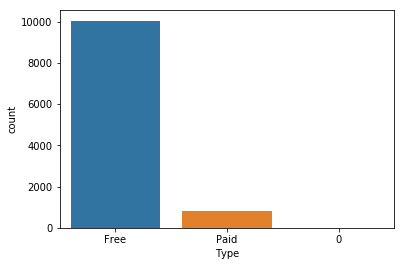

In [13]:
sns.countplot(x='Type',data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


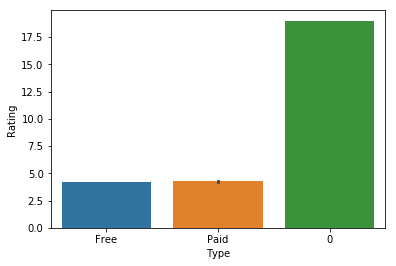

In [14]:
sns.barplot(x='Type', y='Rating', data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


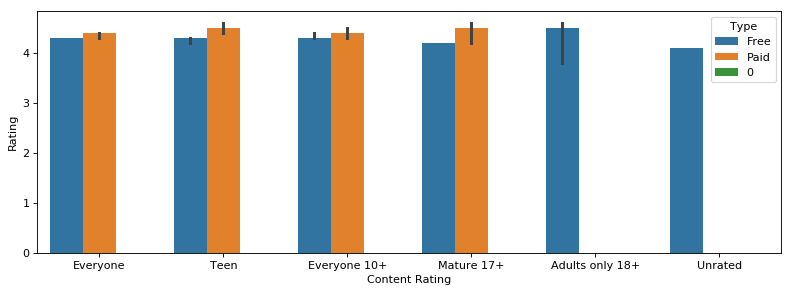

In [15]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='Content Rating', y='Rating', hue="Type", data=data, estimator=np.median)
plt.show()

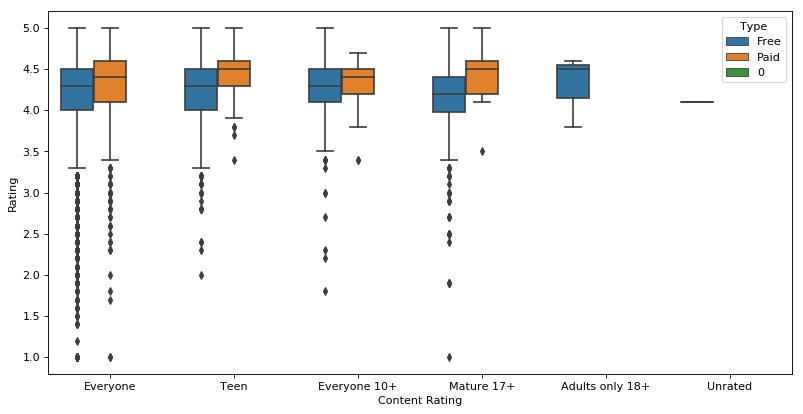

In [16]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='Content Rating', y='Rating', hue="Type", data=data)
plt.show()

### Category

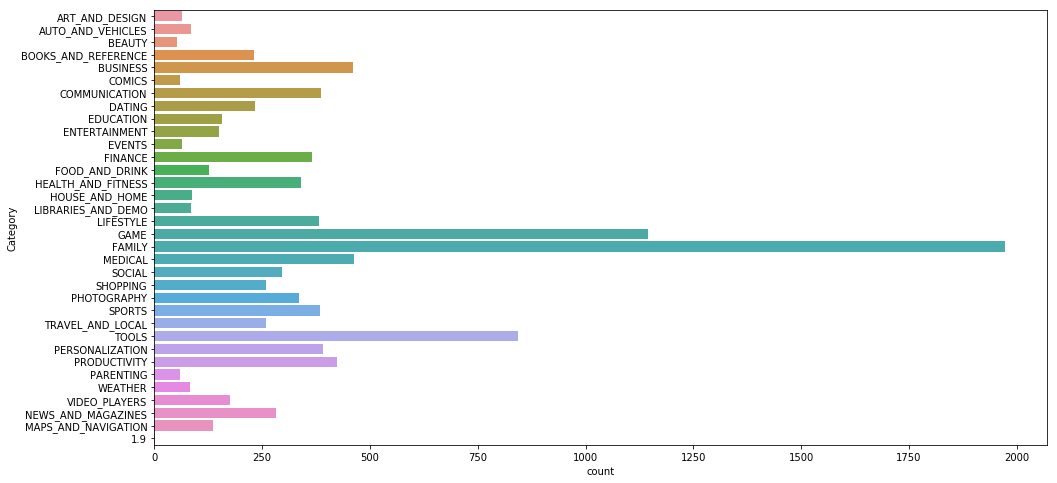

In [17]:
plt.figure(figsize=(16,8))
sns.countplot(y='Category',data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


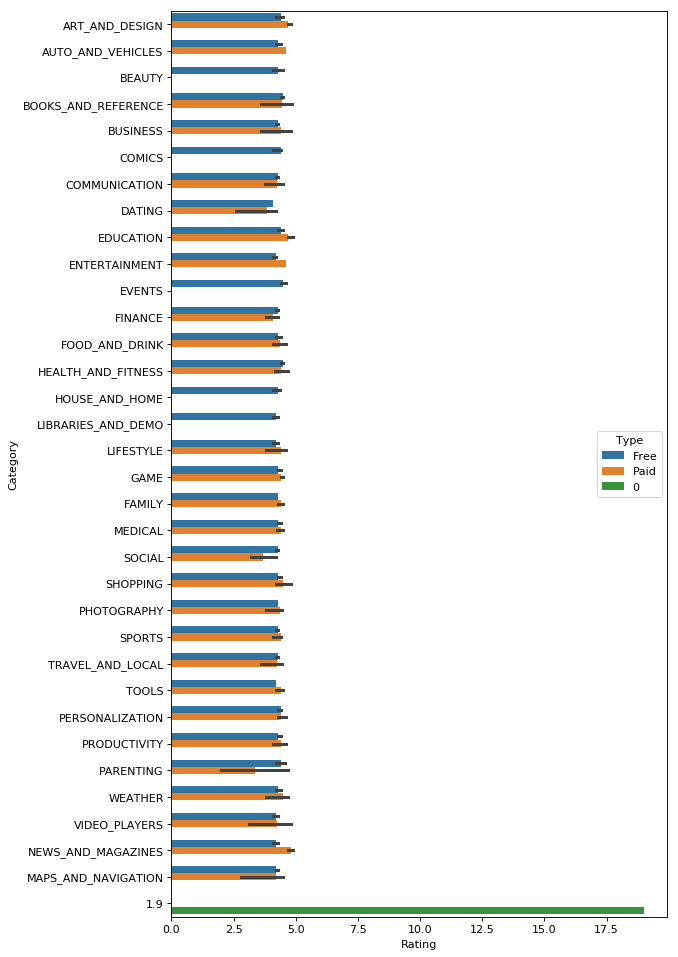

In [18]:
plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(y='Category', x='Rating', hue="Type", data=data, estimator=np.median)
plt.show()

### Content Rating

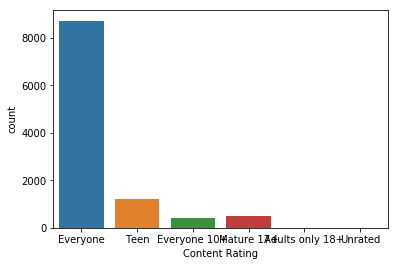

In [19]:
sns.countplot(x='Content Rating',data=data)

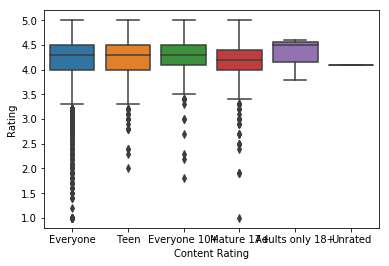

In [20]:
sns.boxplot(x='Content Rating', y='Rating', data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


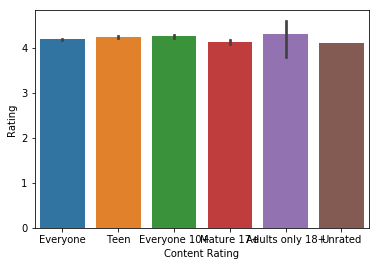

In [21]:
sns.barplot(x='Content Rating', y='Rating', data=data)

### Installs

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


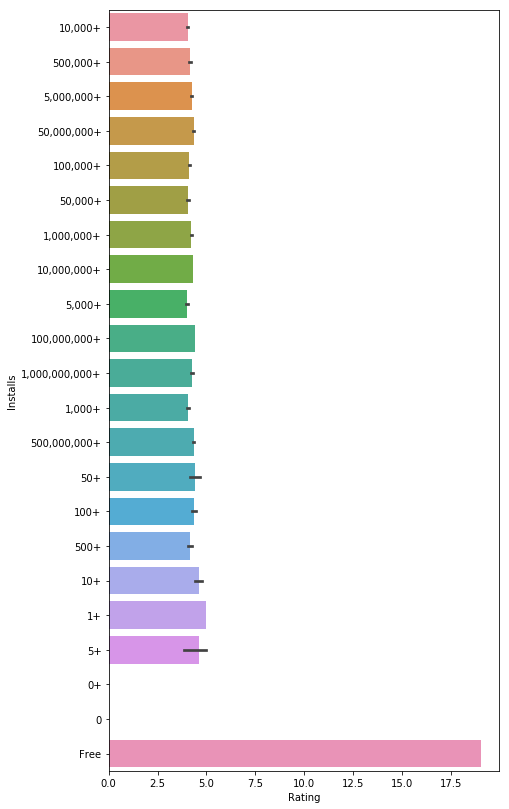

In [22]:
plt.figure(figsize=(7,14))
sns.barplot(y='Installs', x='Rating', data=data)
plt.show()

### Android Version

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


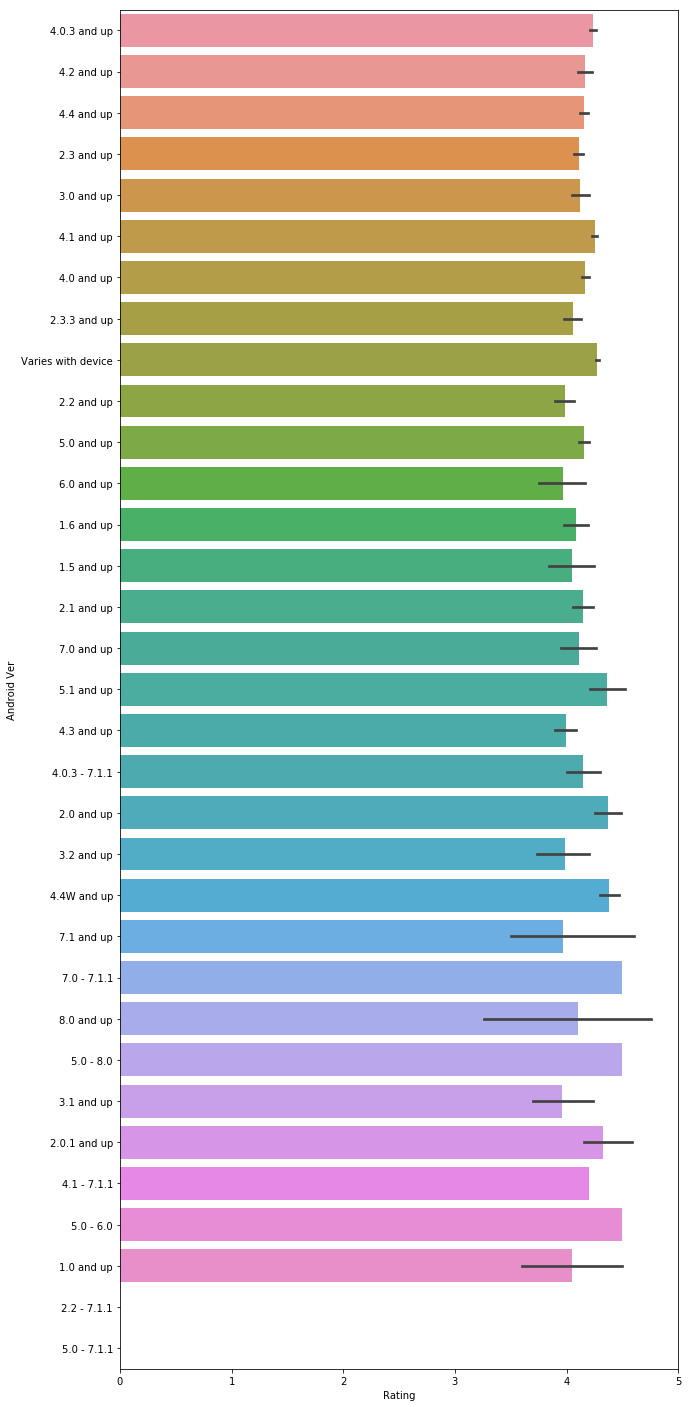

In [23]:
plt.figure(figsize=(10, 25))
sns.barplot(y='Android Ver', x='Rating', data=data)
plt.show()

## Rating

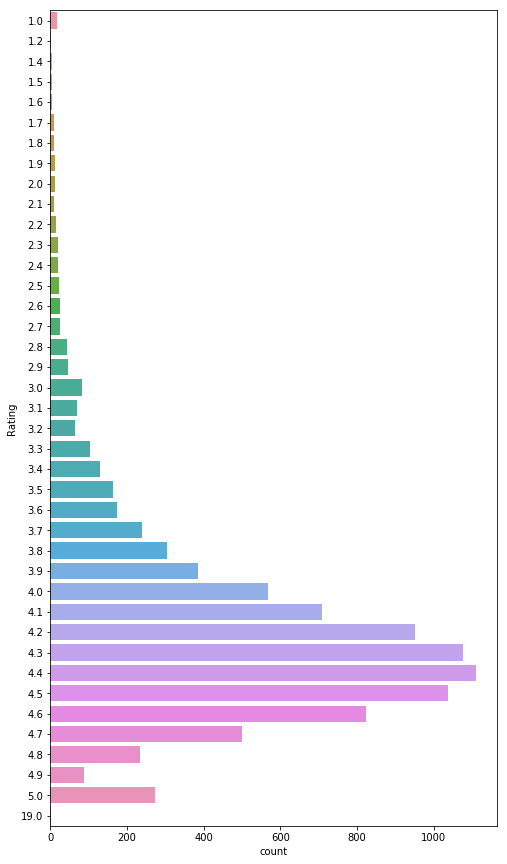

In [24]:
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=data )
plt.show()

<Figure size 432x288 with 0 Axes>

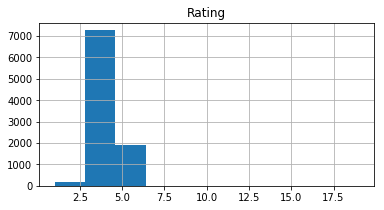

<Figure size 432x288 with 0 Axes>

In [25]:
data.hist(figsize=(6,3))
plt.figure()

## Data Cleaning

##### In this Datasets we observed that the maximum rating of an app is 19 which is not posible yet,we know that the maximum rating of an app in the google play store is 5
##### >>so we confenditly says that something wrong

In [26]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


###### >>here we comparing with other and see the difference

In [27]:
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


###### >>By shifting the row right by 1 we get actual value of rating

In [28]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


###### >>We see that the app 'Life Made WI-Fi Touchscreen Photo Frame' does not have any category,when we search this app on play store we found that it belong to lifestyle category.

<img src="https://www.picclickimg.com/d/l400/pict/323278941996_/Life-Made-Wi-Fi-Digital-Touch-Screen-7-Picture-Frame.jpg" style="width: 550px;"/>


In [29]:
data.isnull().sum().sum()

1487

In [30]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
Android Ver,2,0.000184
App,0,0.000000
Category,1,0.000092
Content Rating,0,0.000000
Current Ver,8,0.000738
Genres,1,0.000092
Installs,0,0.000000
Last Updated,0,0.000000
Price,0,0.000000
Rating,1474,0.135965


In [31]:
data.dropna(inplace=True)

In [32]:
data.shape

(9360, 13)

###### >>initialy our data contain 10841 records and 13 fields here we see after removing missing data our data contain 9360 records with 13 fields.

## Creating Dummy Variables

### Type

In [33]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [34]:
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
typ.head()

,typ_Paid
0,0
1,0
2,0
3,0
4,0


### Content Rating

In [35]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [36]:
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
cr.head()

,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [37]:
data=pd.concat([data,typ,cr],axis=1)
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0


In [38]:
data.drop(['App','Category','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [39]:
data.head(3)

,Rating,Reviews,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,0,1,0,0,0,0
1,3.9,967,0,1,0,0,0,0
2,4.7,87510,0,1,0,0,0,0


## Feature selection

### >> Xstant=X-mean(X)/st.dev(X)

### >> Xnorm=X-min(X)/max(X)-min(X)

In [40]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

##### >> Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

##### >> StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Training & Testing of Model

In [43]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Accuracy of the models

In [44]:
print('LogisticRegression_accuracy:',lr_ac)
print('RandomForest_accuracy:',rdf_ac)
print('DecisionTree_Classifier_accuracy:',dtree_ac)
print('SVM_classifier_accuracy:',sv_ac)

LogisticRegression_accuracy: 0.7644230769230769
RandomForest_accuracy: 0.7056623931623932
DecisionTree_Classifier_accuracy: 0.6981837606837606
SVM_classifier_accuracy: 0.7644230769230769


## I hope this kernel is helpfull for you -->> upvote will motivates and appreciate me for further work.